# Kernel herding examples
The aim of this notebook is to provide simple examples to apply kernel herding on multivariate random inputs with or without a dependency structure.

In [1]:
%matplotlib inline

In [2]:
import openturns as ot
import otkerneldesign as otkd
from plotools import *

In [3]:
from matplotlib import rc, rcParams, style
style.use('default')
rcParams['text.usetex'] = True
#rcParams['text.latex.unicode'] = True
rc('font', **{'family': 'Palatino'})
rc('text', usetex=True)
rc('font', size=16)# Set the default text font size
rc('axes', titlesize=20)# Set the axes title font size
rc('axes', labelsize=16)# Set the axes labels font size
rc('xtick', labelsize=14)# Set the font size for x tick labels
rc('ytick', labelsize=16)# Set the font size for y tick labels
rc('legend', fontsize=16)# Set the legend font size
#rc('figure', titlesize='xx-large')# Set the font size of the figure title

## Independent bivariate random mixture

In [4]:
# Random input variable definition
dim = 10
unifrom = ot.Uniform(0., 1.)
distribution = ot.ComposedDistribution([unifrom] * dim)

The scale parameter is setup by the heuristic proposed by L.Pronzato : $\theta = n^{-1/d}$ 

In [5]:
dimension = distribution.getDimension()
size = 400
# Monte Carlo design
mc_design = distribution.getSample(size)
# Kernel definition
theta = size ** (- 1 / dim)
ker_list = [ot.MaternModel([theta], [1.0], 2.5)] * dimension
kernel = ot.ProductCovarianceModel(ker_list)
# Kernel herding design
kh = otkd.KernelHerding(
    kernel=kernel,
    candidate_set_size=2 ** 14,
    distribution=distribution
)
kh_design = kh.select_design(size)
kh_indexes = kh.get_indices(kh_design)

Using the same kernel, only using the greedy criterion by setting the option "is_greedy" to True.

In [6]:
# Greedy kernel herding design
gkh = otkd.KernelHerding(
    kernel=kernel,
    candidate_set_size=2 ** 14,
    distribution=distribution, 
    is_greedy=True
)
gkh_design = gkh.select_design(size)
gkh_indexes = gkh.get_indices(gkh_design)

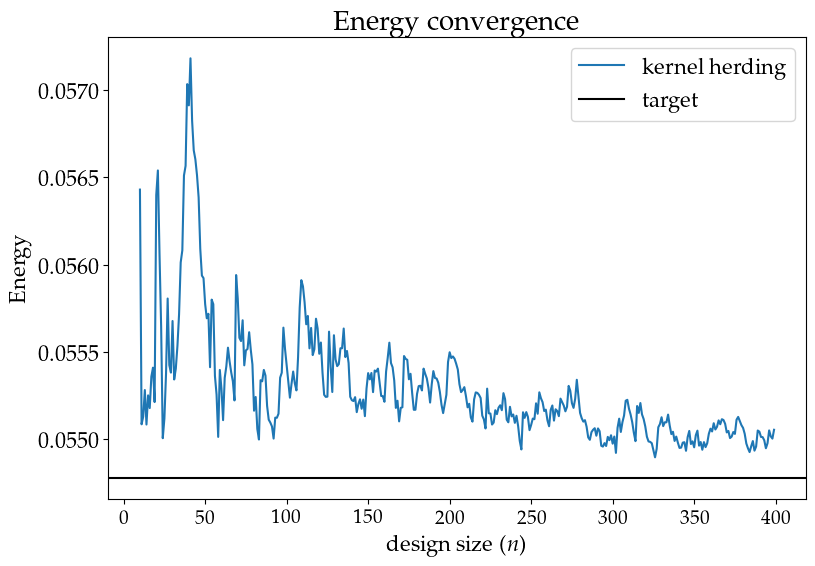

In [7]:
fig1, plot_data1 = kh.draw_energy_convergence(kh_indexes)
fig1

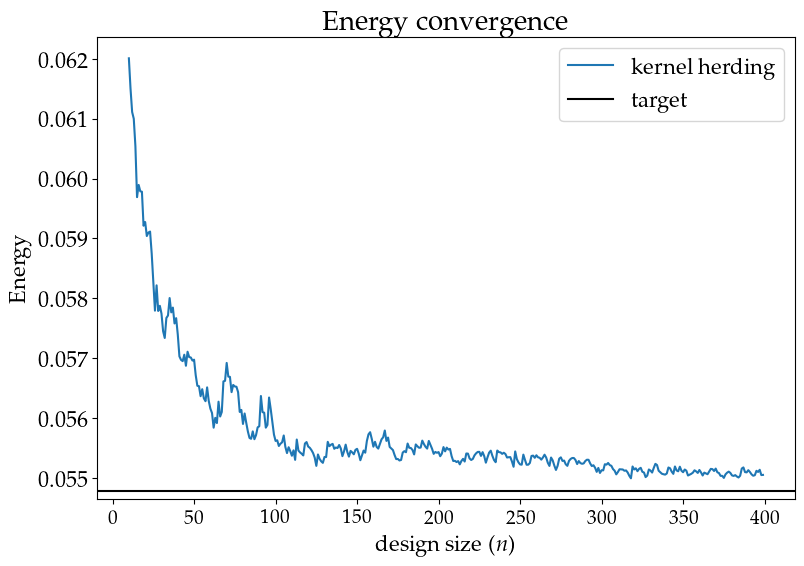

In [8]:
fig2, plot_data2 = gkh.draw_energy_convergence(gkh_indexes)
fig2

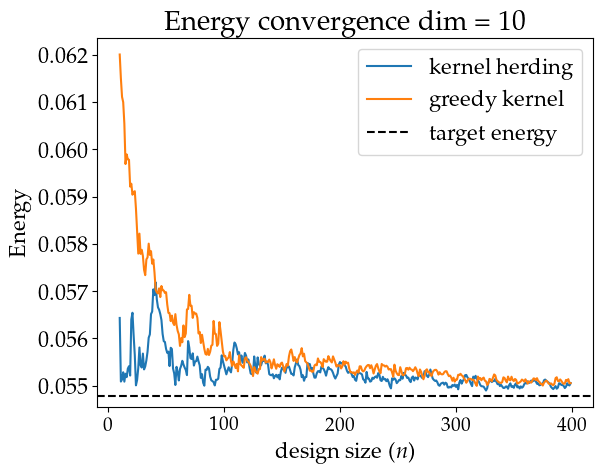

In [9]:
fig3, ax3 = plt.subplots(1,sharey=True, sharex=True)
# Plot data from fig1 and fig2
ax3.plot(plot_data1.get_data()[0], plot_data1.get_data()[1], label=kh._method_label)
ax3.plot(plot_data2.get_data()[0], plot_data2.get_data()[1], label='greedy kernel')
ax3.axhline(kh._target_energy, color='k', linestyle='dashed', label='target energy')
ax3.set_title('Energy convergence dim = {}'.format(dim))
ax3.set_xlabel('design size ($n$)')
ax3.set_ylabel('Energy')
ax3.legend(loc='best');

When increasing the dimension, the two methods first have same convergence rate, however for higher dimensions the kernel herding seem to outperform the kernel greedy. 